# 证券投资学第二次作业
## 小组成员：叶龙翔 熊子睿 陈宇漠

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## 问题1: 在A股市场上, 公司基本面与股票收益率有关系吗
在这一问中, 我们选取的指标为EPS这一个盈利指标, 去探索公司基本面和股票收益率的关系. 我们探索的方法是, 按照这些基本信息排序将股票分为10组, 计算这10组的收益率并做出图像

In [93]:
os.chdir(r"E:\OneDrive\Documents\My files\programming\Python\Test\Dataset\ylx-si")
path=os.getcwd()
EPS=pd.read_csv("EPS.csv", index_col="Date", parse_dates=["Date"])
close=pd.read_csv("close.csv",index_col="Date",parse_dates=["Date"])
EPS=EPS.fillna(method="ffill").dropna()
daily_return=(close/close.shift(1)-1).dropna().loc["2021"]

In [105]:
def stratify_quantile(factor, level=5):
    ret = np.full_like(factor, level)
    for i in np.arange(1, level):
        quan = i / level
        tmp = np.where(np.array(factor) < np.array(factor.quantile(quan, axis=1)).reshape(-1, 1), -1, 0)
        ret = ret + tmp
    ret[pd.isnull(factor)] = np.nan
    ret = pd.DataFrame(ret, index=factor.index, columns=factor.columns)
    return ret
stratified_EPS=stratify_quantile(EPS, 10)
stratified_EPS=pd.DataFrame(stratified_EPS, index=stratified_EPS.index,columns=daily_return.columns)
stratified_EPS=stratified_EPS.fillna(method="ffill").loc["2021"]

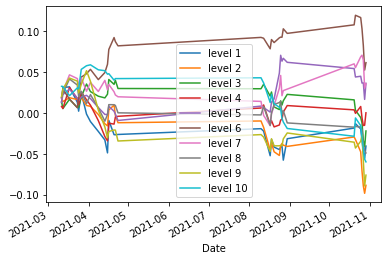

<AxesSubplot:xlabel='Date'>

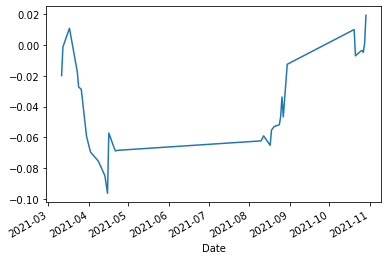

In [109]:
level_ret=[]
for i in range(1,11):
    level_i=daily_return[(stratified_EPS==i).shift(2)].dropna(how="all")
    ret_i=level_i.mean(axis=1)
    level_ret.append(ret_i)
for i in range (10):
    level_ret[i].cumsum().plot(label="level {}".format(i+1))
plt.legend()
plt.show()
(level_ret[0]-level_ret[9]).cumsum().plot()

上面两张图一张是10层的分层收益率曲线, 一张是10层的多空收益率曲线(都是累积收益). 从图中可以看出, 我们没有理由认为其分层收益是一个白噪声序列. 因此公司基本面和股票收益率有关. 但这个关系很可能不是线性的, 比较复杂

## 问题2: 在A股市场上, 移动均线能否预测行情
我们考虑20天的移动均线

In [113]:
ma_20=close.rolling(20).mean().dropna(how="all").loc["2021"]
stratified_ma_20=stratify_quantile(ma_20, 10)
stratified_ma_20=pd.DataFrame(stratified_ma_20, index=stratified_ma_20.index,columns=daily_return.columns)
stratified_ma_20=stratified_ma_20.fillna(method="ffill").loc["2021"]

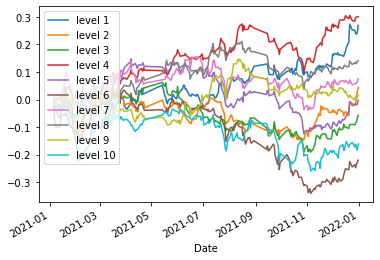

<AxesSubplot:xlabel='Date'>

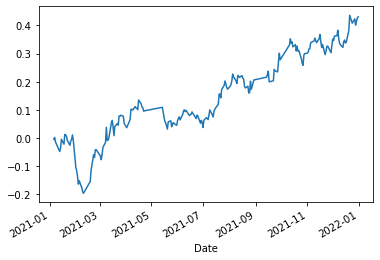

In [114]:
ma_20=close.rolling(20).mean().dropna(how="all").loc["2021"]
stratified_ma_20=stratify_quantile(ma_20, 10)
stratified_ma_20=pd.DataFrame(stratified_ma_20, index=stratified_ma_20.index,columns=daily_return.columns)
stratified_ma_20=stratified_ma_20.fillna(method="ffill").loc["2021"]
level_ret=[]
for i in range(1,11):
    level_i=daily_return[(stratified_ma_20==i).shift(2)].dropna(how="all")
    ret_i=level_i.mean(axis=1)
    level_ret.append(ret_i)
for i in range (10):
    level_ret[i].cumsum().plot(label="level {}".format(i+1))
plt.legend()
plt.show()
(level_ret[0]-level_ret[9]).cumsum().plot()

这种处理方式是错误的, 因为实际上决定性因素是price而不是ma(均线低实际上是股价低). 因此我们将ma做一个标准化. 用均线价格/现在价格的比值作为ma

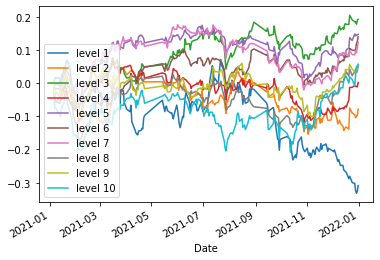

<AxesSubplot:xlabel='Date'>

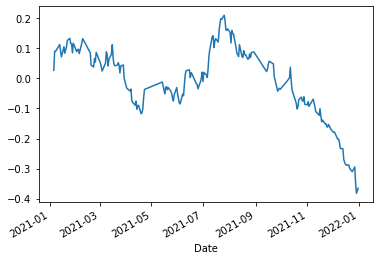

In [118]:
ma_20=(close.rolling(20).mean()/close).dropna(how="all").loc["2021"]
stratified_ma_20=stratify_quantile(ma_20, 10)
stratified_ma_20=pd.DataFrame(stratified_ma_20, index=stratified_ma_20.index,columns=daily_return.columns)
stratified_ma_20=stratified_ma_20.fillna(method="ffill").loc["2021"]
level_ret=[]
for i in range(1,11):
    level_i=daily_return[(stratified_ma_20==i).shift(2)].dropna(how="all")
    ret_i=level_i.mean(axis=1)
    level_ret.append(ret_i)
for i in range (10):
    level_ret[i].cumsum().plot(label="level {}".format(i+1))
plt.legend()
plt.show()
(level_ret[0]-level_ret[9]).cumsum().plot()

仍然是可以的